# Custom Datasets
* we have to work on our own dataset , but how to do??--->> Solution is Custom Datasets.
## Domain Libraries

* Depending on what you are working on, vision, test, audio, recommendation , we have to look into each of the PyTorch domain lbraries for the data laoding functions and customizable data loading functions.

## Importing Pytorch and Setting up Device agnostic code

In [161]:
import torch
from torch import nn

In [162]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Get Data- Helper function

* our data set is a subset of the Food101 dataset. It contains only 3  Classes of food and only 10 % of the images

* When starting out ML projexts, its important to try things on a small scale andthen increase the scale when necesary
* The whole point is to speed up how fast you can experiment

In [163]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


## 2. Becoming one with the Data

In [164]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [165]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.


In [166]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### Visualizing an image



Random image path: data/pizza_steak_sushi/test/sushi/2521706.jpg
Image class: sushi
Image height: 512
Image width: 384


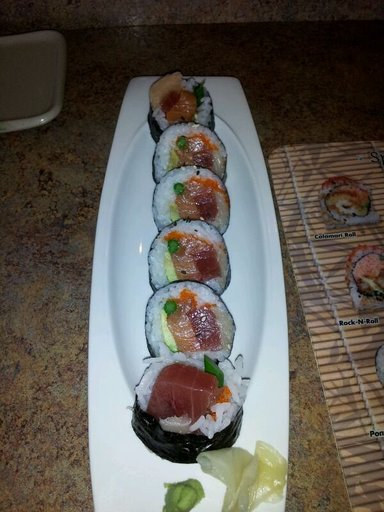

In [167]:
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

### Visualize using Matplotlib


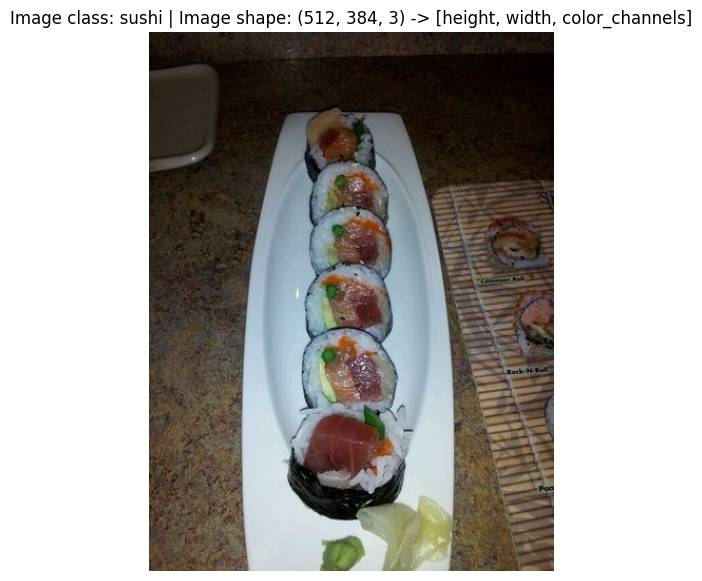

In [168]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(7, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

## 3. Transforming Data in tensor  format
* Turning it to tensors
*  Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`

In [169]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Transforming Data with `torchvision.transforms`

In [170]:
data_transform = transforms.Compose(
    [
        # Resize the image
        transforms.Resize(size=(64,64)),
        # Flip the image horizontal
        transforms.RandomHorizontalFlip(p=0.5),
        #Turning the image to tensor
        transforms.ToTensor()
    ]
)

<function matplotlib.pyplot.show(close=None, block=None)>

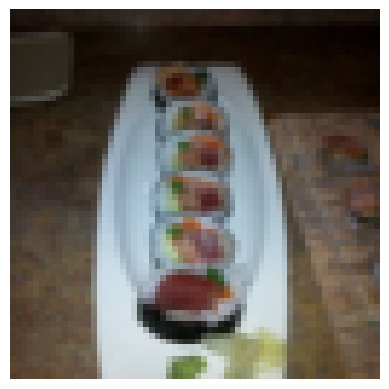

In [171]:
plt.imshow(data_transform(img).permute(1,2,0))
plt.axis(False)
plt.show


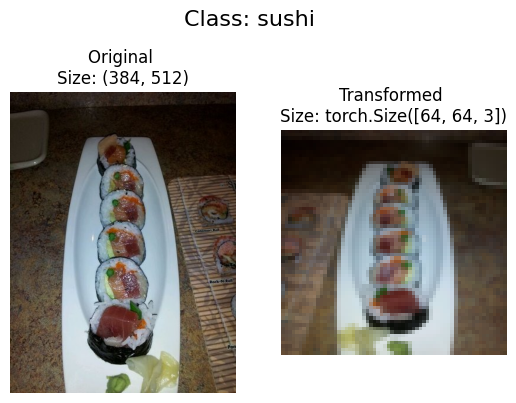

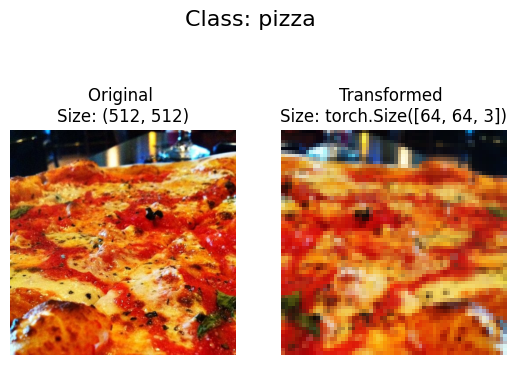

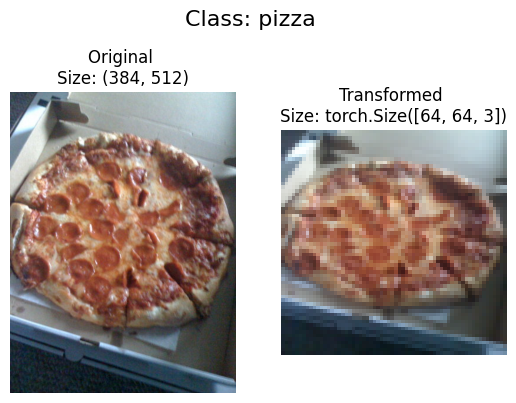

In [172]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

## 4 Option 1: Loading image data using `ImageFolder`

In [173]:
from torchvision import datasets, transforms

train_data = datasets.ImageFolder(root = train_dir,
                                  transform = data_transform,
                                  target_transform = None)

test_data = datasets.ImageFolder(root = test_dir,
                                 transform = data_transform,
                                 target_transform = None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [174]:
train_data.classes

['pizza', 'steak', 'sushi']

In [175]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

Getting sample image

In [176]:
img, label = train_data[0][0], train_data[0][1]

print(f'Image: {img}')
print(f'Label:{label}')
print(f'Image Shape: {img.shape}')
print(f'Image Data Type: {img.dtype}')
print(f'Label Data Type: {type(label)}')

Image: tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0

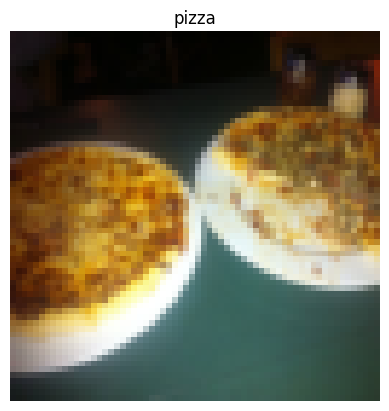

In [177]:
image_permute =img.permute(1,2,0) # for matyplot lib
image_permute.shape

plt.imshow(image_permute)
plt.axis(False)
plt.title(train_data.classes[label])
plt.show()

### Turn Loaded images to data loader

In [178]:
import os
os.cpu_count()

2

In [179]:
BATCH_SIZE = 32

train_loader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = os.cpu_count()
)

test_loader = DataLoader(
    dataset = test_data,
    shuffle = False,
    batch_size  = BATCH_SIZE,
    num_workers = os.cpu_count()

)


In [180]:
len(train_loader), len(test_loader)

(8, 3)

In [181]:
img, label = next(iter(train_loader))
print(f'Image Shape: {img.shape}--> Batch_size, Colour Channe, heoght, weidth')
print(f'Label Shape: {label.shape}')

Image Shape: torch.Size([32, 3, 64, 64])--> Batch_size, Colour Channe, heoght, weidth
Label Shape: torch.Size([32])


## Data Augmentation
* Trivial augmentation

In [182]:
from torchvision import transforms
train_transorm = transforms.Compose(
    [transforms.Resize(size = (224,224)),
     transforms.TrivialAugmentWide(num_magnitude_bins=31),
     transforms.ToTensor()]
)

test_transform = transforms.Compose(
    [transforms.Resize(size=(224,224)),
     transforms.ToTensor]
)

# MODEL -Tiny_VGG

## Importing Dependencies

In [183]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [184]:
# Devuice agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Dataset Loading from the web

In [185]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


In [186]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [187]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## Data Transform

In [188]:
Data_transform_train = transforms.Compose([
    transforms.Resize(size= (224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

Data_transform_test = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
                                         ])

## Loading Image Data Using `ImageFolder`

In [189]:
train_data = datasets.ImageFolder(root = train_dir,
                                  transform= Data_transform_train,
                                  target_transform=None)

test_data = datasets.ImageFolder(root = test_dir,
                                 transform= Data_transform_test,
                                 target_transform=None)

Image: tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.1765, 0.1686, 0.1686,  ..., 0.1608, 0.1529, 0.1490],
         [0.1608, 0.1686, 0.1647,  ..., 0.1451, 0.1412, 0.1333],
         [0.1647, 0.1647, 0.1647,  ..., 0.1412, 0.1333, 0.1255]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.2471, 0.2392, 0.2392,  ..., 0.1569, 0.1451, 0.1451],
         [0.2314, 0.2392, 0.2353,  ..., 0.1490, 0.1373, 0.1333],
         [0.2314, 0.2314, 0.2353,  ..., 0.1373, 0.1373, 0.1333]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0

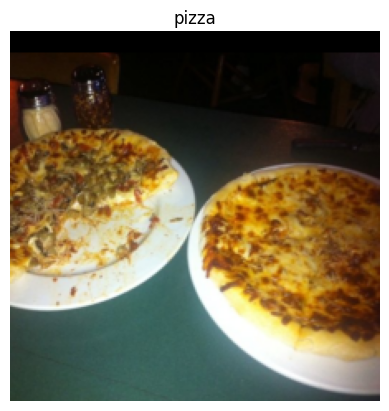

In [190]:
import matplotlib.pyplot as plt
import random

img, label = train_data[0][0], train_data[0][1]

print(f'Image: {img}')
print(f'Label:{label}')
print(f'Image Shape: {img.shape}')
print(f'Image Data Type: {img.dtype}')
print(f'Label Data Type: {type(label)}')

plt.imshow(img.permute(1,2,0))
plt.axis(False)
plt.title(train_data.classes[label])
plt.show()

## DataLoader

In [191]:
import os
NUM_OF_WORKERS = os.cpu_count()

BATCH_SIZE = 32


train_loader = DataLoader(dataset = train_data,
                          batch_size = BATCH_SIZE,
                          shuffle = True,
                          num_workers = NUM_OF_WORKERS)

test_loader = DataLoader(dataset = test_data,
                         batch_size = BATCH_SIZE,
                         shuffle = False,
                         num_workers= NUM_OF_WORKERS)


## Model 1: MODELV1

In [192]:
class ModelV1(nn.Module):
  def __init__(self, input_shape, hidden_units1, hidden_units2, output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features =input_shape, out_features = hidden_units1),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units1, out_features = hidden_units2),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units2, out_features = hidden_units2),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units2, out_features = hidden_units1),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units1, out_features = output_shape)

    )

  def forward(self, x):
    return self.layer_stack(x)

In [193]:
output_shape = len(train_data.classes)
output_shape

3

In [194]:
## model Instances
torch.manual_seed(42)
torch.cuda.manual_seed(42)

input_shape = 3*224*224
hidden_units1 = 128
hidden_units2 = 512
output_shape = len(train_data.classes)


model_1 = ModelV1(input_shape,
                  hidden_units1,
                  hidden_units2,
                  output_shape).to(device)

model_1

ModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=150528, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=512, bias=True)
    (6): ReLU()
    (7): Linear(in_features=512, out_features=128, bias=True)
    (8): ReLU()
    (9): Linear(in_features=128, out_features=3, bias=True)
  )
)

### Optimizer and Loss function

In [195]:
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

### Training Loop

In [ ]:


epochs = 11

for epoch in tqdm(range(epochs)):
  train_loss = 0.0
  test_loss = 0.0
  train_acc = 0.0
  test_acc = 0.0

  for batch, (X_train, y_train) in enumerate(train_loader):
    model_1.train()
    X_train, y_train = X_train.to(device), y_train.to(device)
    # Forward PAss
    y_logits = model_1(X_train)
    y_prob = torch.softmax(y_logits, dim = 1)
    y_pred = torch.argmax(y_prob, dim = 1)
    #Loss and Accurcy
    loss = Loss(y_logits, y_train)
    acc = accuracy_score(y_train.cpu().numpy(),
                         y_pred.cpu().numpy())
    # optimizer zero grad
    optimizer.zero_grad()
    #Loss backward
    loss.backward()
    #optimizer.step()
    optimizer.step()

    train_loss += loss.item()
    train_acc += acc

  for _, (X_test,y_test) in enumerate(test_loader):
    model_1.eval()
    X_test, y_test = X_test.to(device), y_test.to(device)
    with torch.inference_mode():
      #Forward Pass
      test_logits = model_1(X_test)
      test_prob = torch.softmax(test_logits, dim = 1)
      test_pred = torch.argmax(test_prob, dim = 1)
      # Loss and Accuracy
      t_loss = Loss(test_logits, y_test)
      t_acc = accuracy_score(y_test.cpu().numpy(),test_pred.cpu().numpy())

      test_loss += t_loss.item()
      test_acc += t_acc



  train_loss /= len(train_loader)
  train_acc /= len(train_loader)
  test_loss /= len(test_loader)
  test_acc /= len(test_loader)

  print(f"Epoch: {epoch}\n-----")
  print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
  print(f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

print(f"F1 Score: {f1_score(y_test.cpu().numpy(),test_pred.cpu().numpy(), average='weighted', zero_division = 0)}")
print(f"Precision Score: {precision_score(y_test.cpu().numpy(),test_pred.cpu().numpy(), average='weighted', zero_division = 0)}")
print(f"Recall Score: {recall_score(y_test.cpu().numpy(),test_pred.cpu().numpy(), average='weighted', zero_division = 0)}")
print(f"Accuracy Score: {accuracy_score(y_test.cpu().numpy(),test_pred.cpu().numpy())}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test.cpu().numpy(),test_pred.cpu().numpy())}")

  0%|          | 0/11 [00:00<?, ?it/s]

Epoch: 0
-----
Train Loss: 1.0901 | Train Acc: 0.4258
Test Loss: 1.1152 | Test Acc: 0.2604
Epoch: 1
-----
Train Loss: 1.0860 | Train Acc: 0.4258
Test Loss: 1.1318 | Test Acc: 0.2604
Epoch: 2
-----
Train Loss: 1.1087 | Train Acc: 0.3047
Test Loss: 1.1055 | Test Acc: 0.2604
Epoch: 3
-----
Train Loss: 1.1070 | Train Acc: 0.3047
Test Loss: 1.1147 | Test Acc: 0.2604
Epoch: 4
-----
Train Loss: 1.1062 | Train Acc: 0.3008
Test Loss: 1.1012 | Test Acc: 0.2604
Epoch: 5
-----
Train Loss: 1.1019 | Train Acc: 0.3047
Test Loss: 1.1158 | Test Acc: 0.2604
Epoch: 6
-----
Train Loss: 1.1057 | Train Acc: 0.2930
Test Loss: 1.0899 | Test Acc: 0.4422
Epoch: 7
-----
Train Loss: 1.0973 | Train Acc: 0.2734
Test Loss: 1.0718 | Test Acc: 0.5521


#Model_2: Tiny_vgg

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [ ]:
# Devuice agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

## Data set Loading

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

In [ ]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

In [ ]:
Data_transform_train = transforms.Compose([
    transforms.Resize(size= (224, 224)),
    #transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

Data_transform_test = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
                                         ])

In [ ]:
train_data = datasets.ImageFolder(root = train_dir,
                                   transform = Data_transform_train,
                                   target_transform = None)

test_data = datasets.ImageFolder(root = test_dir,
                                   transform = Data_transform_test,
                                  target_transform = None
                                   )

### DataLoader

In [ ]:
train_loader = DataLoader(dataset = train_data,
                          batch_size = 32,
                          shuffle = True)

test_loader = DataLoader(dataset = test_data,
                          batch_size = 32,
                          shuffle = False)

## MODEL: TinyVGG

In [ ]:
class tinyVGG(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    #Convolution Block 1
    self.ConvBlock_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size =2,
                     stride = 2)# default stride value is same as kernel SIze
        )
    # Convolution Block 2
    self.ConvBlock_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding= 0
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )
    # Feed Forward NN
    self.Classifier = nn.Sequential(
        # Flatten the Layer
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*53*53, ## Need to be calculate dusing the priogrammung
                  out_features = output_shape)

    )
  def forward(self,x):
    x = self.ConvBlock_1(x)
    #print(x.shape)
    x = self.ConvBlock_2(x)
    #print(x.shape)
    x = self.Classifier(x)
    #print(x.shape)
    return x



#### Dummy Example for finding the hidden zise for the classifier input

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_vgg = tinyVGG(
    input_shape = 3, # channel ios RGB
    hidden_units = 30,
    output_shape = len(train_data.classes)
).to(device)
model_vgg

In [ ]:
pip install torchinfo


In [ ]:
from torchinfo import summary

# Print the summary
summary(model_vgg, input_size=(1, 3, 224, 224))  # Batch size 1, 3 channels, 224x224 image


In [ ]:
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_vgg.parameters(), lr = 0.01)

In [ ]:
img, label = next(iter(train_loader))  # Extract one sample  # Add batch dimension and move to device
print(img.shape)
print(label.shape)

logit = model_vgg(img.to(device))  # Forward pass
print(logit)


## Training Loop

In [ ]:
epochs = 5

train_losses = []  # List to store training losses
test_losses = []   # List to store test losses

from tqdm.auto import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)

for epoch in tqdm(range(epochs)):
  train_loss = 0.0
  train_acc = 0.0

  model_vgg.train()
  for batch, (X_train, y_train) in enumerate(train_loader):
    X_train, y_train  = X_train.to(device), y_train.to(device)

    #Forward Pass
    y_logits = model_vgg(X_train)
    y_pob = torch.softmax(y_logits, dim = 1)
    y_pred = torch.argmax(y_pob, dim =1)

    # loss and accuracy
    loss = Loss(y_logits, y_train)
    # optimizer zero grad
    optimizer.zero_grad()
    #loss backward
    loss.backward()
    # Optimizer step
    optimizer.step()

    train_loss += loss.item()
    train_acc += (y_pred ==y_train).sum().item()/len(y_train) # because we are handling a small unbalanced data set
  train_loss /= len(train_loader)
  train_acc /= len(train_loader)
  train_losses.append(train_loss)

  test_loss = 0.0
  test_acc = 0.0
  model_vgg.eval()
  with torch.inference_mode():
    for _, (X_test, y_test) in enumerate(test_loader):
      X_test, y_test = X_test.to(device), y_test.to(device)

      test_logits = model_vgg(X_test)
      test_prob = torch.softmax(test_logits, dim = 1)
      test_pred = torch.argmax(test_prob, dim = 1)

      t_loss = Loss(test_logits, y_test)
      test_loss += t_loss.item()
      test_acc += (test_pred == y_test).sum().item()/len(y_test)

  test_loss /= len(test_loader)
  test_acc /= len(test_loader)
  test_losses.append(test_loss)

  print(f"\n Epoch: {epoch} \n---------")
  print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
  print(f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

In [ ]:
# Plot the training and test losses
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_losses, label='Train Loss', color='blue')
plt.plot(range(epochs), test_losses, label='Test Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


## We are not getting teh plots as we want


## This time what we will do is e wil use data augmettation and other techniques for the model

# Model: Tiny_vgg_2

## Dependencies

In [31]:
import torch
from torch import nn

import numpy as np

import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [32]:
## Setting up device agnosi]tic code
device = 'cuda'if torch.cuda.is_available() else 'cpu'
device

'cpu'

## Dataset

In [89]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


In [90]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [91]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## Ading Data aumentation

In [126]:
train_data_transform = transforms.Compose(

                                          [transforms.Resize(size=(64,64)),
                                           #transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                           transforms.ToTensor()]
)

test_data_transform = transforms.Compose(
    [transforms.Resize(size=(64,64)),
     transforms.ToTensor()]
)

In [127]:
train_data = datasets.ImageFolder(root = train_dir,
                                  transform = train_data_transform

                                  )

test_data = datasets.ImageFolder(root = test_dir,

                                 transform = test_data_transform
                                 )

In [128]:
train_loader = DataLoader(dataset = train_data,
                          batch_size = 32,
                          shuffle = True)

test_loader = DataLoader(dataset = test_data,
                          batch_size = 32,
                          shuffle = False)

## Our model

In [129]:
class tinyVGG2(nn.Module):
  def __init__(self, input_shape, hidden_shape, output_shape):
    super().__init__()

    self.ConvBlock1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_shape,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_shape,
                  out_channels = hidden_shape,
                  kernel_size = 3,
                  stride = 2,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )
    self.ConvBlock2 = nn.Sequential(
        nn.Conv2d( in_channels = hidden_shape,
                  out_channels = hidden_shape,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_shape,
                  out_channels = hidden_shape,
                  kernel_size = 3,
                  stride = 2,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )
    self.Classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_shape*4*4, ## need to be calculates
                  out_features = output_shape )
    )

  def forward(self, x):
    x = self.ConvBlock1(x)
    #print(x.shape)
    x = self.ConvBlock2(x)
    #print(x.shape)
    x = self.Classifier(x)
    return x

In [130]:
## Dummy data pass
img, labels = next(iter(train_loader))
print(img.shape)

torch.Size([32, 3, 64, 64])


In [131]:
dum_model = tinyVGG2(input_shape = 3,
                     hidden_shape = 10,
                     output_shape = len(train_data.classes))
dum_model(img)

tensor([[-0.0350,  0.0342, -0.0053],
        [-0.0341,  0.0318, -0.0058],
        [-0.0354,  0.0334, -0.0044],
        [-0.0354,  0.0333, -0.0049],
        [-0.0333,  0.0346, -0.0052],
        [-0.0342,  0.0345, -0.0037],
        [-0.0340,  0.0332, -0.0059],
        [-0.0342,  0.0335, -0.0045],
        [-0.0352,  0.0324, -0.0054],
        [-0.0325,  0.0317, -0.0051],
        [-0.0343,  0.0325, -0.0037],
        [-0.0356,  0.0312, -0.0062],
        [-0.0365,  0.0329, -0.0069],
        [-0.0353,  0.0327, -0.0054],
        [-0.0340,  0.0340, -0.0050],
        [-0.0349,  0.0319, -0.0046],
        [-0.0347,  0.0327, -0.0045],
        [-0.0358,  0.0319, -0.0061],
        [-0.0347,  0.0317, -0.0067],
        [-0.0353,  0.0330, -0.0038],
        [-0.0347,  0.0336, -0.0056],
        [-0.0370,  0.0337, -0.0058],
        [-0.0336,  0.0348, -0.0048],
        [-0.0317,  0.0321, -0.0050],
        [-0.0351,  0.0317, -0.0051],
        [-0.0334,  0.0344, -0.0047],
        [-0.0355,  0.0345, -0.0067],
 

In [132]:
## Model Instances

modelVGG2 = tinyVGG2(input_shape = 3,
                     hidden_shape = 10,
                     output_shape = len(train_data.classes)
).to(device)

modelVGG2

tinyVGG2(
  (ConvBlock1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (ConvBlock2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=3, bias=True)
  )
)

## Training Loop

In [133]:
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = modelVGG2.parameters(), lr = 0.1)

In [134]:
EPOCHS = 20

from tqdm.auto import tqdm
train_losss = []
test_losss= []

train_accc = []
test_accc = []

torch.manual_seed(42)
torch.cuda.manual_seed(42)

for epoch in tqdm(range(EPOCHS)):

  modelVGG2.train()
  train_loss = 0.0
  train_acc = 0.0
  for batch, (X_train, y_train) in enumerate(train_loader):


    X_train, y_train = X_train.to(device), y_train.to(device)



    y_logits = modelVGG2(X_train)
    y_pred = torch.argmax(torch.softmax(y_logits, dim = 1), dim = 1)

    loss = Loss(y_logits, y_train)
    acc = accuracy_score(y_train.cpu().numpy(),
                         y_pred.cpu().numpy())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss = train_loss + loss.item()
    train_acc = train_acc + acc

  train_loss /= len(train_loader)
  train_acc /= len(train_loader)
  train_losss.append(train_loss)
  train_accc.append(train_acc)

  modelVGG2.eval()
  test_loss = 0.0
  test_acc = 0.0
  with torch.inference_mode():
    for _, (X_test, y_test) in enumerate(test_loader):

      X_test, y_test = X_test.to(device), y_test.to(device)

      test_logits = modelVGG2(X_test)
      test_pred = torch.argmax(torch.softmax(test_logits, dim = 1), dim = 1)

      t_loss = Loss(test_logits, y_test)
      t_acc = accuracy_score(y_test.cpu().numpy(),
                             test_pred.cpu().numpy())

      test_loss = test_loss + t_loss.item()
      test_acc = test_acc + t_acc

  test_loss /= len(test_loader)
  test_acc /= len(test_loader)
  test_losss.append(test_loss)
  test_accc.append(test_acc)

  print(f"Epoch: {epoch}\n ----------")
  print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
  print(f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")





  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0
 ----------
Train Loss: 6.0583 | Train Acc: 0.2656
Test Loss: 1.1296 | Test Acc: 0.1979
Epoch: 1
 ----------
Train Loss: 1.0777 | Train Acc: 0.4180
Test Loss: 1.1749 | Test Acc: 0.2604
Epoch: 2
 ----------
Train Loss: 1.0824 | Train Acc: 0.4258
Test Loss: 1.1995 | Test Acc: 0.2604
Epoch: 3
 ----------
Train Loss: 1.1419 | Train Acc: 0.3047
Test Loss: 1.1763 | Test Acc: 0.2604
Epoch: 4
 ----------
Train Loss: 1.1000 | Train Acc: 0.3008
Test Loss: 1.1648 | Test Acc: 0.1979
Epoch: 5
 ----------
Train Loss: 1.0959 | Train Acc: 0.2891
Test Loss: 1.1467 | Test Acc: 0.1979
Epoch: 6
 ----------
Train Loss: 1.0873 | Train Acc: 0.4141
Test Loss: 1.1510 | Test Acc: 0.1979
Epoch: 7
 ----------
Train Loss: 1.1252 | Train Acc: 0.2930
Test Loss: 1.1630 | Test Acc: 0.1979
Epoch: 8
 ----------
Train Loss: 1.1263 | Train Acc: 0.2930
Test Loss: 1.1414 | Test Acc: 0.2604
Epoch: 9
 ----------
Train Loss: 1.0930 | Train Acc: 0.3008
Test Loss: 1.0720 | Test Acc: 0.2604
Epoch: 10
 ----------
Train Lo

## Loss Curve

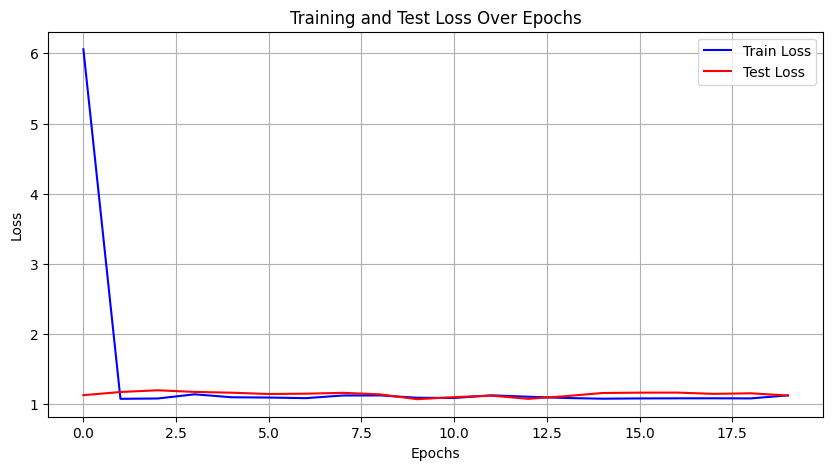

In [135]:
# Plot the training and test losses
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(EPOCHS), train_losss, label='Train Loss', color='blue')
plt.plot(range(EPOCHS), test_losss, label='Test Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


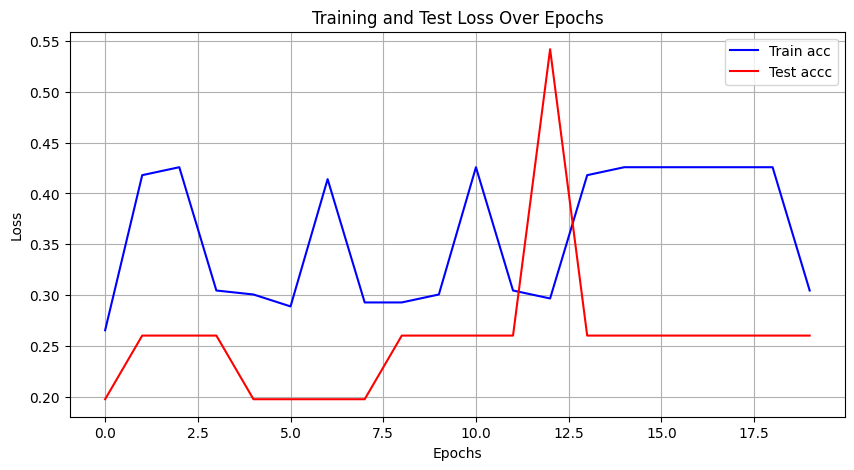

In [136]:
# Plot the training and test losses
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(EPOCHS), train_accc, label='Train acc', color='blue')
plt.plot(range(EPOCHS), test_accc, label='Test accc', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()